This dataset has been retrieved from the mavenanalytics.io website. The data for this project consist of mock train data for a company named National Rail, that provides business services to passenger train operators in the England, Scotland, and Wales. The time frame for the train trips is between December of 2023 and April of 2024. The included details of the data are type of ticket, date and time of purchase, date and time of journey, departure and arrival times, reason for delay, station, payment type, ,and purchase type.

In this project, I will demonstrate how to use Python to load a csv file into a datafram. I will then demonstrate how to inspect the data, checking for correct dtypes, duplicate values, and the count of unique and null values per column. I will then demonstrate how to extract the month, day, and hour values from the date columns to further enhance my analysis. Lastly, I will move on to answering and creating visualizations to the business questions inquired by National Rail.

QUESTIONS:

1) Can you identify the most popular routes?
2) Can you determine peak travel times?
3) Can you analyze revenue from different ticket types and classes?
4) Can you diagnose on-time performance and contributing factors?

I will first immport the neccessary libraries required for my analysis.

In [3]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
sns.set_style("darkgrid")

Now I will use the pandas library to load my data into a dataframe.

In [4]:
railway = pd.read_csv(r"C:\Users\mjaso\Downloads\UK+Train+Rides_Project\railway.csv")

Now that my data is loaded, I will examine the first and last 5 rows to check for consistency.

In [5]:
railway.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,None,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,None,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,None,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [6]:
railway.tail()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,NaN,No
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,20:15:00,21:35:00,21:35:00,On Time,NaN,No
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit Card,None,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:15:00,20:45:00,20:45:00,On Time,NaN,No
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit Card,None,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,21:15:00,22:35:00,22:35:00,On Time,NaN,No
31652,1d5d89a2-bde5-410f-8f91,2024-04-30,20:05:39,Station,Credit Card,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-04-30,21:30:00,22:00:00,22:00:00,On Time,NaN,No


Data looks to be imported correctly with no errors, now I will check how many rows and columns are in this dataframe.

In [7]:
df_rows = railway.shape[0]
df_columns = railway.shape[1]
print(f"There are {df_rows} rows and {df_columns} columns of data in this dataframe.")

There are 31653 rows and 18 columns of data in this dataframe.


I will move on to checking the dataframe for any duplicate rows of data.

In [8]:
duplicated_rows = railway.duplicated().sum()
print(f"There are {duplicated_rows} rows of duplicate data in this dataframe.")

There are 0 rows of duplicate data in this dataframe.


Now I will count the number of N/A values in each column in the dataframe.

In [9]:
for na in railway.columns:
    na_val = railway[na].isnull().sum()
    print(f"There are {na_val} N/A in the column {na}.")

There are 0 N/A in the column Transaction ID.
There are 0 N/A in the column Date of Purchase.
There are 0 N/A in the column Time of Purchase.
There are 0 N/A in the column Purchase Type.
There are 0 N/A in the column Payment Method.
There are 0 N/A in the column Railcard.
There are 0 N/A in the column Ticket Class.
There are 0 N/A in the column Ticket Type.
There are 0 N/A in the column Price.
There are 0 N/A in the column Departure Station.
There are 0 N/A in the column Arrival Destination.
There are 0 N/A in the column Date of Journey.
There are 0 N/A in the column Departure Time.
There are 0 N/A in the column Arrival Time.
There are 1880 N/A in the column Actual Arrival Time.
There are 0 N/A in the column Journey Status.
There are 27481 N/A in the column Reason for Delay.
There are 0 N/A in the column Refund Request.


I will also perform the same process for counting the unique values in each column in the dataframe.

In [10]:
for un in railway.columns:
    unval = railway[un].nunique()
    print(f"The column {un} has {unval} unique values.")

The column Transaction ID has 31653 unique values.
The column Date of Purchase has 128 unique values.
The column Time of Purchase has 24351 unique values.
The column Purchase Type has 2 unique values.
The column Payment Method has 3 unique values.
The column Railcard has 4 unique values.
The column Ticket Class has 2 unique values.
The column Ticket Type has 3 unique values.
The column Price has 125 unique values.
The column Departure Station has 12 unique values.
The column Arrival Destination has 32 unique values.
The column Date of Journey has 121 unique values.
The column Departure Time has 96 unique values.
The column Arrival Time has 203 unique values.
The column Actual Arrival Time has 623 unique values.
The column Journey Status has 3 unique values.
The column Reason for Delay has 8 unique values.
The column Refund Request has 2 unique values.


Now I'm going to check the dtypes of the columns to ensure they are in the correct format.

In [11]:
railway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             31653 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

So all of my date and time columns in this dataframe are dtype 'object'. I will utilize pandas datetime function to convert those columns to the correct dtypes.

In [12]:
railway["Date of Purchase"] = pd.to_datetime(railway["Date of Purchase"])
railway["Time of Purchase"] = pd.to_datetime(railway["Time of Purchase"])
railway["Date of Journey"] = pd.to_datetime(railway["Date of Journey"])
railway["Departure Time"] = pd.to_datetime(railway["Departure Time"])
railway["Arrival Time"] = pd.to_datetime(railway["Arrival Time"])
railway["Actual Arrival Time"] = pd.to_datetime(railway["Actual Arrival Time"])

Let me verify the changes.

In [13]:
railway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Transaction ID       31653 non-null  object        
 1   Date of Purchase     31653 non-null  datetime64[ns]
 2   Time of Purchase     31653 non-null  datetime64[ns]
 3   Purchase Type        31653 non-null  object        
 4   Payment Method       31653 non-null  object        
 5   Railcard             31653 non-null  object        
 6   Ticket Class         31653 non-null  object        
 7   Ticket Type          31653 non-null  object        
 8   Price                31653 non-null  int64         
 9   Departure Station    31653 non-null  object        
 10  Arrival Destination  31653 non-null  object        
 11  Date of Journey      31653 non-null  datetime64[ns]
 12  Departure Time       31653 non-null  datetime64[ns]
 13  Arrival Time         31653 non-

Perfect. I can now see the date and time columns reflect the correct dtypes.

I will also extract the month, day, and the hour from the same columns that were corrected.

In [14]:
railway["Month of Purchase"] = railway["Date of Purchase"].dt.month
railway["Day of Purchase"] = railway["Date of Purchase"].dt.day
railway["Hour of Purchase"] = railway["Time of Purchase"].dt.hour
railway["Month of Journey"] = railway["Date of Journey"].dt.month
railway["Day of Journey"] = railway["Date of Journey"].dt.day
railway["Departure Hour"] = railway["Departure Time"].dt.hour
railway["Arrival Hour"] = railway["Arrival Time"].dt.hour
railway["Actual Arrival Hour"] = railway["Actual Arrival Time"].dt.hour

Now I will check to vefify that the new columns have been added to the dataframe.

In [15]:
railway.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request', 'Month of Purchase', 'Day of Purchase',
       'Hour of Purchase', 'Month of Journey', 'Day of Journey',
       'Departure Hour', 'Arrival Hour', 'Actual Arrival Hour'],
      dtype='object')

I will now take a look at the numerical columns for statistical information.

In [16]:
railway.describe()

,Price,Month of Purchase,Day of Purchase,Hour of Purchase,Month of Journey,Day of Journey,Departure Hour,Arrival Hour,Actual Arrival Hour
count,31653.000000,31653.000000,31653.000000,31653.000000,31653.000000,31653.000000,31653.000000,31653.000000,29773.00000
mean,23.439200,2.489748,14.896945,11.459356,2.491833,16.091840,11.629830,12.078571,12.11104
std,29.997628,1.170074,8.534006,6.291924,1.119871,8.524342,6.147796,6.267162,6.27989
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000
25%,5.000000,1.000000,8.000000,6.000000,1.000000,9.000000,7.000000,7.000000,7.00000
50%,11.000000,3.000000,14.000000,11.000000,3.000000,16.000000,12.000000,12.000000,12.00000
75%,35.000000,3.000000,22.000000,17.000000,3.000000,23.000000,17.000000,18.000000,18.00000
max,267.000000,12.000000,31.000000,23.000000,4.000000,31.000000,23.000000,23.000000,23.00000


This gives me a quick glimpse of columns min, max, avg, std, and percentile figures.

Now I will look at the categorical columns statistical information.

In [17]:
railway.describe(include="object")

,Transaction ID,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Departure Station,Arrival Destination,Journey Status,Reason for Delay,Refund Request
count,31653,31653,31653,31653,31653,31653,31653,31653,31653,4172,31653
unique,31653,2,3,4,2,3,12,32,3,8,2
top,da8a6ba8-b3dc-4677-b176,Online,Credit Card,None,Standard,Advance,Manchester Piccadilly,Birmingham New Street,On Time,Weather,No
freq,1,18521,19136,20918,28595,17561,5650,7742,27481,995,30535


This gives me a quick glimpse of columns counts, the number of unique values, the top value, and the frequency of the top value.

Now that I have thoroughly examined the data, I will now move on to answering the questions provided by National Rail.

QUESTIONS:

###### 1) Can you identify the most popular routes?

In [18]:
top_10_popular_routes = railway[["Departure Station", "Arrival Destination"]].value_counts().reset_index()[:10]
top_10_popular_routes

,Departure Station,Arrival Destination,0
0,Manchester Piccadilly,Liverpool Lime Street,4628
1,London Euston,Birmingham New Street,4209
2,London Kings Cross,York,3922
3,London Paddington,Reading,3873
4,London St Pancras,Birmingham New Street,3471
5,Liverpool Lime Street,Manchester Piccadilly,3002
6,Liverpool Lime Street,London Euston,1097
7,London Euston,Manchester Piccadilly,712
8,Birmingham New Street,London St Pancras,702
9,London Paddington,Oxford,485


The results display the top 10 most popular routes with Manchester Piccadilly to Liverpool Lime Street being the most popular with 4,628 total journeys.

I will now display these results in a visual.

Liverpool Lime Street is the most popular Arrival Destination.


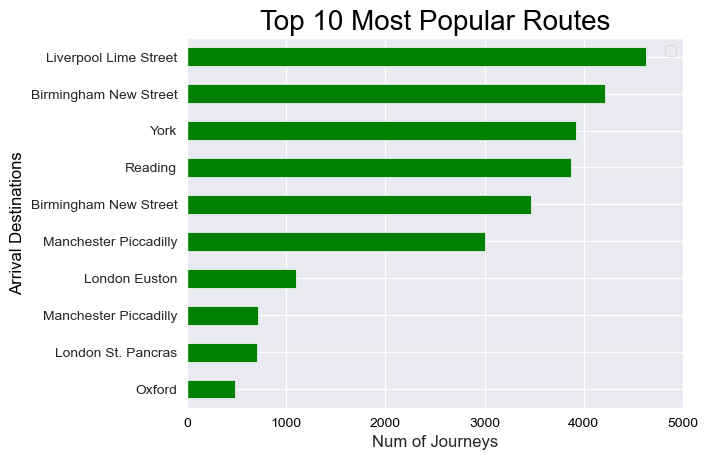

In [19]:
top_10_popular_routes.sort_index(ascending=False).plot(kind="barh",
                                                       color="green")
plt.title("Top 10 Most Popular Routes",
          color="black",
          fontsize=20)
plt.legend("")
plt.yticks([0,1,2,3,4,5,6,7,8,9],
           ["Oxford", "London St. Pancras", "Manchester Piccadilly", "London Euston", "Manchester Piccadilly", "Birmingham New Street", "Reading", "York", "Birmingham New Street", "Liverpool Lime Street"])
plt.ylabel("Arrival Destinations",
           color="black")
journeys = list(range(0,6000,1000))
plt.xticks(journeys, [f"{j}" for j in journeys], 
           color="black")
plt.xlabel("Num of Journeys")
print("Liverpool Lime Street is the most popular Arrival Destination.")

###### 2) Can you determine peak travel times?

In [20]:
peak_hours = railway.groupby(["Month of Journey", "Departure Hour"])["Departure Hour"].count().sort_values(ascending=False)
peak_hours = pd.DataFrame(peak_hours)
peak_hours.rename(columns={"Month of Journey": "Month of Journey",
                           "Departure Hour": "Departure Hour",
                           "Departure Hour": "Count of Hours"}, inplace=True)
peak_hours
peak_hours[:24]
top_peak_hrs = peak_hours[:24].sort_values(by=["Month of Journey","Count of Hours"], ascending=[True, False])
top_peak_hrs

Count of Hours
Month of Journey Departure Hour                
1                6                          824
                 18                         783
                 7                          737
                 17                         707
                 16                         606
                 8                          568
2                6                          773
                 18                         730
                 17                         716
                 7                          687
                 16                         513
                 8                          510
3                18                         817
                 6                          809
                 17                         743
                 7                          710
                 16                         600
                 8                          554
4                18                         783
                 17                         722
                 6                          706
                 7                          661
                 16                         582
                 8                          547

With the code above, I am able to determine that during the months of January and Feburary, the 6 most frequent travel times were 6am, 7am, 8am, 4pm, 5pm, and 6pm. With the 6am hour experiencing the most number of journey's. During the months of March and April, the 6 most frequent travel times were also 6am, 7am, 8am, 4pm, 5pm and 6pm. During these two months, the 6pm hour experienced the most number of journeys.

###### 3) Can you analyze revenue from different ticket types and classes?

###### **Total Revenue by Ticket Type and Ticket Class**

In [21]:
total_rev_by_type_class = railway.groupby(["Ticket Type", "Ticket Class"])["Price"].sum().reset_index()
total_rev_by_type_class
total_rev_by_type_class.rename(columns={"Price": "Total Revenue"}, inplace=True)
total_rev_type_class = total_rev_by_type_class.sort_values(by=["Total Revenue", "Ticket Class"], ascending=[False, True]).reset_index()
total_rev_type_class

,index,Ticket Type,Ticket Class,Total Revenue
0,1,Advance,Standard,242388
1,5,Off-Peak,Standard,178666
2,3,Anytime,Standard,171468
3,0,Advance,First Class,66886
4,4,Off-Peak,First Class,44672
5,2,Anytime,First Class,37841


The Advanced ticket type with the standard ticket class generates the highest total revenue at 242,388 dollars. While the Anytime ticket type with the first class ticket class generates the lowest total revenue at 37,841 dollars.

Now I will look at the total revenue by ticket type.

###### **Total Revenue by Ticket Type**

In [22]:
total_rev_by_type = railway.groupby("Ticket Type")["Price"].sum().reset_index()
total_rev_by_type.rename(columns={"Price": "Total Revenue"}, inplace=True)
total_rev_type = total_rev_by_type.sort_values(by="Total Revenue", ascending=False)
total_rev_type

,Ticket Type,Total Revenue
0,Advance,309274
2,Off-Peak,223338
1,Anytime,209309


Advance ticket types generate the highest amount of revenue with 309,274 dollars, followed by Off-Peak at 222,338 dollars, and then Anytime ticket types which generate 209,309 dollars in total revenue.

I will visualize the percentages of the total revenue by ticket type in a pie chart.

The pie chart displays the percentages of revenue by ticket type.


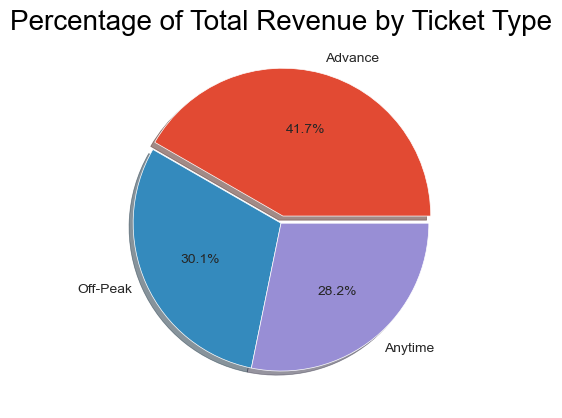

In [23]:
e = [0.05, 0, 0]
plt.pie(total_rev_type["Total Revenue"], labels=total_rev_type["Ticket Type"],
        autopct="%1.1f%%", 
        explode=e,
        shadow=True)
plt.title("Percentage of Total Revenue by Ticket Type",
          color="black",
          fontsize=20)
print("The pie chart displays the percentages of revenue by ticket type.")

Now I will look at the total revenue by ticket class.

###### **Total Revenue by Ticket Class**

In [24]:
total_rev_by_class = railway.groupby("Ticket Class")["Price"].sum().reset_index()
total_rev_by_class.rename(columns={"Price": "Total Revenue"}, inplace=True)
total_rev_class = total_rev_by_class.sort_values(by="Total Revenue", ascending=False)
total_rev_class

,Ticket Class,Total Revenue
1,Standard,592522
0,First Class,149399


The Standard ticket class generates the most revenue with 592,522 dollars, while the First Class ticket class generates a total revenue of 149,399 dollars.

I will display these results in a bar graph for visualization.

The bar chart below shows us that the standard ticket class generates a higher revenue than the first class ticket class.


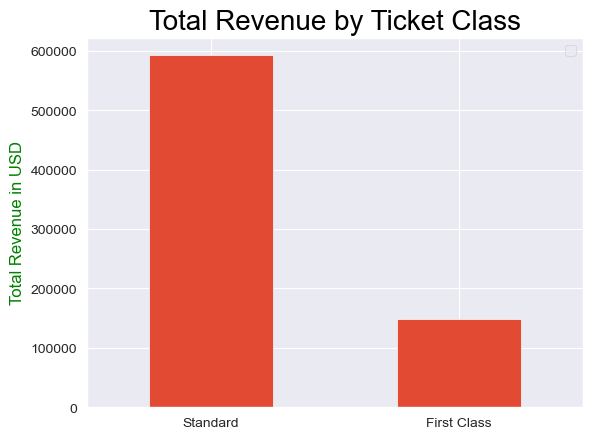

In [25]:
total_rev_class.plot(kind="bar",rot=0)
plt.title("Total Revenue by Ticket Class",
          color="black",
          fontsize=20)
plt.legend("")
plt.xticks([0,1], ["Standard", "First Class"])
plt.ylabel("Total Revenue in USD", 
           color="green")
print("The bar chart below shows us that the standard ticket class generates a higher revenue than the first class ticket class.")

###### 4) Diagnose on-time performance and contributing factors?

In [26]:
on_time_performance_factors = railway.groupby(["Journey Status", "Reason for Delay"])["Reason for Delay"].count()
on_time_performance_factors = pd.DataFrame(on_time_performance_factors)
on_time_performance_factors.rename(columns={"Reason for Delay": "Count of Status"}, inplace=True)
on_time_performance_factors

Count of Status
Journey Status Reason for Delay                   
Cancelled      Signal Failure                  281
               Signal failure                  238
               Staff Shortage                  216
               Staffing                        238
               Technical Issue                 235
               Traffic                         227
               Weather                         237
               Weather Conditions              208
Delayed        Signal Failure                  242
               Signal failure                  209
               Staff Shortage                  183
               Staffing                        172
               Technical Issue                 472
               Traffic                          87
               Weather                         758
               Weather Conditions              169

The most number of journey's delayed were 758, which were delayed due to weather. While the least number of journey's delayed were 87, with the reason for delay being due to traffic. The most number of journey's cancelled were 281 which were due to signal failure. While the least number of journeys cancelled were 208, being cancelled due to weather conditions.